# Práctica 1: Análisis exploratorio de datos, preprocesamiento y validación de modelos de clasificación\*

### Minería de Datos: Curso académico 2020-2021

### Profesorado:

* Juan Carlos Alfaro Jiménez
* José Antonio Gámez Martín

\* Adaptado de las prácticas de Jacinto Arias Martínez y Enrique González Rodrigo

En esta práctica vamos a trabajar algunos de los aspectos más importantes del proceso *KDD* (*Knowledge Discovery from Data*):

* Almacenamiento y carga de datos
* Análisis exploratorio de datos
* Preprocesamiento de datos
* Validación de modelos de clasificación

Para ello, aprenderemos a manipular y visualizar los datos mediante distintas funciones de las librerías `pandas` y `plotly`. Además, aprenderemos a utilizar algoritmos de clasificación como *Zero-R* y árboles de decisión usando la librería `scikit-learn`.

El objetivo de la práctica será aprender a cargar, explorar y preparar nuestros datos, aprender y validar distintos modelos de clasificación y ser capaces de interpretar los resultados obtenidos. Para lograrlo, utilizaremos tres conjuntos de datos sintéticos:

- `iris`: https://www.kaggle.com/uciml/iris
- `pima_diabetes`: https://www.kaggle.com/uciml/pima-indians-diabetes-database
- `wisconsin`: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

La descripción de cada uno de estos conjuntos de datos se encuentra en el enlace correspondiente.

# 1. Preliminares

Antes de comenzar es necesario cargar las librerías a emplear para que estén disponibles para su posterior uso:

In [1]:
# Third party
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

# Local application
import miner_a_de_datos_an_lisis_exploratorio_utilidad as utils

Además, fijamos una semilla para que los experimentos sean reproducibles:

In [2]:
seed = 27912

# 2. Acceso y almacenamiento de datos

Se trata de uno de los problemas críticos en cualquier aplicación real, ya que tendremos que tener en cuenta numerosas preguntas:

* ¿Dónde se generan los datos?
* ¿Con qué frecuencia?
* ¿Cuánto cuesta transmitirlos?
* ¿Dónde se van a almacenar?
* ¿Cuánto ocupan?
* ...

Además de añadir un alto grado de dificultad al proceso, las soluciones que aportemos suelen ser *ad-hoc*, esto es, para un problema concreto. Debido a esto es muy probable que tengamos que repetir gran parte del esfuerzo proyecto a proyecto.

Por este motivo, trabajaremos en un entorno especialmente diseñado para experimentación, en el que gran parte del trabajo ya está realizado y los datos se encuentran procesados en un formato legible y cómodo. Dichos datos nos servirán de *benchmark* para evaluar, desde nuestras técnicas de preprocesamiento, hasta los modelos que construyamos. Esto permitirá solucionar el problema desde un punto de vista análitico y dejar la integración tecnológica para más adelante.

Concretamente, haremos uso de uno de los formatos más sencillos y expresivos de datos estructurados que existen: `csv` (*Comma Separated Values*). Un fichero `csv` no es más que un fichero de texto plano donde los datos se almacenan a modo de matriz, en la que cada fila empieza en una nueva línea y cada valor está separado por comas. Al ser ficheros de texto plano se pueden editar con cualquier procesador de texto. Por convención, estos ficheros se guardan con extensión `csv` en lugar de `txt`.

De manera adicional a los datos es muy común incluir una primera fila de cabecera indicando el nombre de cada columna.

---

**Palabras clave**:

* Las filas se denominan **instancias**, **casos** o **ejemplos**.
* Las columnas son **variables** de nuestro problema.

---

El conjunto de datos que vamos a emplear es `iris`. Este fue creado en 1936 por el estadístico y biólogo Ronald Fisher. Se trata de un conjunto de datos muy utilizado, ya que presenta una serie de propiedades que lo hacen ideal para introducirse en este campo. Este contiene 150 muestras tomadas de 3 especies de flores:

* `Iris-setosa`
* `Iris-virginica`
* `Iris-versicolor`

Que conforman los valores de la variable a predecir (`Species`). Para cada una de las flores se han realizado una serie de mediciones correspondientes a las variables predictoras del problema:

* `SepalLengthCm`: Longitud del sépalo (en centímetros)
* `SepalWidthCm`: Anchura del sépalo (en centímetros)
* `PetalLengthCm`: Longitud del pétalo (en centímetros)
* `PetalWidthCm`: Anchura del pétalo (en centímetros)

El objetivo sería clasificar una nueva instancia (cuya especie es desconocida) en función de sus propiedades.

---

**Palabras clave:**

* La variable del conjunto de datos a predecir se denomina **variable objetivo** (t.c.c. **variable clase** en problemas de clasificación).

* El conjunto de **características** o **variables predictoras** es el conjunto de datos sin la variable objetivo (únicamente con las variables que se utilizan para predecirla).

---

Comenzamos cargando el conjunto de datos `iris`:

In [3]:
filepath = "../input/iris/Iris.csv"

index = "Id"
target = "Species"

data = utils.load_data(filepath, index, target)

Nótese que se ha especificado cuál es la variable correspondiente al identificador de casos del conjunto de datos (`index="Id"`) y la variable clase (`target="Species"`).

Una vez hemos cargado el conjunto de datos es fundamental comprobar que el proceso ha funcionado sin problemas, y que las variables y los valores están dentro de lo esperado. Para ello, podemos escoger una instancia al azar o mostrar las primeras instancias del conjunto de datos.

Podemos usar la función `head` para obtener las `n` primeras instancias del conjunto de datos:

In [4]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Esta función es muy útil para comprobaciones rápidas, pero no hay que olvidar que las instancias siempre serán las primeras en orden consecutivo. Esto puede ser un problema si queremos hacer alguna comprobación estadística, ya que la muestra estará sesgada. Para evitar este problema, lo ideal es obtener una muestra aleatoria del conjunto de datos con `sample`.

--------------

**Palabras clave**:

- Una **muestra sesgada** es aquella que no hemos obtenido con la aleatoriedad suficiente como para que sea representativa de todo el conjunto de datos.

---------------

In [5]:
data.sample(5, random_state=seed)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
106,7.6,3.0,6.6,2.1,Iris-virginica
133,6.4,2.8,5.6,2.2,Iris-virginica
132,7.9,3.8,6.4,2.0,Iris-virginica
52,6.4,3.2,4.5,1.5,Iris-versicolor
48,4.6,3.2,1.4,0.2,Iris-setosa


Es muy útil disponer del conjunto de datos separado dos subconjuntos, uno con las variables predictoras (`X`) y otro con la variable objetivo (`y`). Se puede utilizar el siguiente fragmento de código para dividirlo: 

In [6]:
(X, y) = utils.divide_dataset(data, target="Species")

De nuevo, comprobamos que se haya separado correctamente. Comenzamos con las variables predictoras:

In [7]:
X.sample(5, random_state=seed)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
106,7.6,3.0,6.6,2.1
133,6.4,2.8,5.6,2.2
132,7.9,3.8,6.4,2.0
52,6.4,3.2,4.5,1.5
48,4.6,3.2,1.4,0.2


Y continuamos con la variable clase:

In [8]:
y.sample(5, random_state=seed)

Id
106     Iris-virginica
133     Iris-virginica
132     Iris-virginica
52     Iris-versicolor
48         Iris-setosa
Name: Species, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Si bien podríamos comenzar con el análisis exploratorio es fundamental separar nuestro conjunto de datos **como mínimo** en dos:

* Una muestra de entrenamiento (típicamente, 70%)
* Una muestra de prueba (típicamente, 30%)

En un proceso conocido como *holdout*. De este modo, podemos dejar el conjunto de prueba a modo de instancias no observadas para asegurarnos que los resultados de validación han sido estimados de manera honesta (y no optimista). De hecho, si utilizamos el mismo conjunto de datos para aprender y validar un modelo, observaremos un resultado inusual y es que, conforme más sobreajustado está el modelo, menor es el error cometido.

Para realizar un *holdout* podemos utilizar el método `train_test_split` de `scikit-learn`:

---

**Palabras clave:**

* Decimos que un modelo está **sobreajustado** cuando sus parámetros se han aprendido de manera que intentan reproducir perfectamente el conjunto de entrenamiento (de los que conocemos su resultado). Este sobre-entrenamiento (***overfitting***) implica que al modelo le costará más discriminar nuevos casos que presenten datos que nunca han sido observados, presentando un mayor nivel de error en su uso en el mundo real. Cuando un clasificador se aprende de manera que se elimina el sobre-entrenamiento, se dice que **generaliza**.

---

In [9]:
train_size = 0.7

(X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                                      stratify=y,
                                                      random_state=seed,
                                                      train_size=train_size)

Nótese que, por defecto, las instancias del conjunto de datos se aleatorizan antes de realizar el *holdout* (`shuffle=True`). Esto es muy importante para evitar que, en conjunto de datos ordenados por los valores de la variable clase (como ocurre en `iris`) eliminemos, de uno de los conjuntos, todas las instancias de una (o varias) clase (o clases).

Por otro lado, la semilla se establece mediante el parámetro `random_state` (`random_state=seed`). Este es necesario para que en el proceso de *holdout* siempre se realicen las mismas particiones de entrenamiento y prueba, y así podamos garantizar la reproducibilidad de los experimentos.

Por último, comentar que se ha aplicado un *holdout* estratificado (`stratify=y`), esto es, se ha preservado la proporción de ejemplos de cada clase durante la división. Esto es importante en casos complejos (p.e., problemas desbalanceados) para evitar eliminar gran cantidad de información (aleatorizar el conjunto de datos puede no ser suficiente).

De nuevo, vamos a asegurarnos de que el conjunto de datos se ha dividido correctamente en entrenamiento y prueba. Comenzamos con las variables predictoras del conjunto de datos de entrenamiento:

In [10]:
X_train.sample(5, random_state=seed)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
49,5.3,3.7,1.5,0.2
33,5.2,4.1,1.5,0.1
66,6.7,3.1,4.4,1.4
63,6.0,2.2,4.0,1.0
111,6.5,3.2,5.1,2.0


Y prueba:

In [11]:
X_test.sample(5, random_state=seed)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
88,6.3,2.3,4.4,1.3
6,5.4,3.9,1.7,0.4
109,6.7,2.5,5.8,1.8
91,5.5,2.6,4.4,1.2
28,5.2,3.5,1.5,0.2


Por último, finalizamos con la variable objetivo del conjunto de datos de entrenamiento:

In [12]:
y_train.sample(5, random_state=seed)

Id
49         Iris-setosa
33         Iris-setosa
66     Iris-versicolor
63     Iris-versicolor
111     Iris-virginica
Name: Species, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Y prueba:

In [13]:
y_test.sample(5, random_state=seed)

Id
88     Iris-versicolor
6          Iris-setosa
109     Iris-virginica
91     Iris-versicolor
28         Iris-setosa
Name: Species, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Para facilitar el análisis exploratorio de datos, volvemos a juntar las variables predictoras con la variable clase. Comenzamos con el conjunto de datos de entrenamiento:

In [14]:
data_train = utils.join_dataset(X_train, y_train)

Y continuamos con el conjunto de datos de prueba:

In [15]:
data_test = utils.join_dataset(X_test, y_test)

Para asegurarnos de que se han juntado correctamente, obtenemos una muestra aleatoria del conjunto de datos de entrenamiento:

In [16]:
data_train.sample(5, random_state=seed)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
49,5.3,3.7,1.5,0.2,Iris-setosa
33,5.2,4.1,1.5,0.1,Iris-setosa
66,6.7,3.1,4.4,1.4,Iris-versicolor
63,6.0,2.2,4.0,1.0,Iris-versicolor
111,6.5,3.2,5.1,2.0,Iris-virginica


Y del conjunto de datos de prueba:

In [17]:
data_test.sample(5, random_state=seed)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
88,6.3,2.3,4.4,1.3,Iris-versicolor
6,5.4,3.9,1.7,0.4,Iris-setosa
109,6.7,2.5,5.8,1.8,Iris-virginica
91,5.5,2.6,4.4,1.2,Iris-versicolor
28,5.2,3.5,1.5,0.2,Iris-setosa


# 3. Análisis exploratorio de datos

Antes de comenzar el preprocesamiento es interesante observar las propiedades del conjunto de datos, analizando sus variables y la interacción entre estas. No obstante, no podemos usar el formato tabular directamente puesto que para un humano es casi imposible extraer conclusiones a partir del análisis de valores numéricos. Por ello, nos apoyaremos en gráficos y estadísticos.

### Descripción del conjunto de datos

Antes de realizar cualquier operación es fundamental conocer nuestro problema. Hay dos dimensiones básicas que deben ser exploradas:

* Número de casos
* Número de variables
    * Tipo de las variables: Continuas (t.c.c. numéricas) o discretas (t.c.c. categóricas)

Para ello, consultaremos las estructuras de datos correspondientes.

---

**Palabras clave**:

- Una **variable continua** es aquella que se representa mediante valores numéricos y que se distribuye de acuerdo con una función (p.e., distribución normal).

- Una **variable discreta** es aquella compuesta por un conjunto finito de valores (denominados **estados**) a los que se les puede asignar un significado, distribuyéndose de acuerdo a una función probabilística que determina su **frecuencia**.

---

El número de casos y variables (respectivamente) del conjunto de datos de entrenamiento se puede obtener consultando el atributo `shape`:

In [18]:
data_train.shape

(105, 5)

Tal y como se puede observar, el conjunto de datos de entrenamiento está formado por 105 casos y 5 variables (4 variables predictoras y 1 variable clase).

Para conocer cuál es el tipo de las variables, recurrimos al método `info`:

In [19]:
data_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 138 to 59
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SepalLengthCm  105 non-null    float64 
 1   SepalWidthCm   105 non-null    float64 
 2   PetalLengthCm  105 non-null    float64 
 3   PetalWidthCm   105 non-null    float64 
 4   Species        105 non-null    category
dtypes: category(1), float64(4)

De acuerdo con esto, las variables predictoras del conjunto de datos de entrenamiento (`SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm` y `PetalWidthCm`) son numéricas (`float64`). Por contra, la variable clase (`Species`) es categórica (`category`, especificada al cargar el conjunto de datos) y contiene los siguientes estados:

In [20]:
y_train.cat.categories

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

Esto es, nuestra variable clase es multivariada con tres estados.

### Visualización de las variables

Una vez conocemos con más detalle el conjunto de datos de entrenamiento, lo que debemos hacer es representar y analizar las distribuciones de las variables. Para ello, utilizaremos métodos univariados, esto es, histogramas para las variables numéricas y diagramas de barras para las variables categóricas. En particular:

* Un histograma muestra la densidad de ejemplos para los distintos valores de una variable numérica.
* Un diagrama de barras representa la frecuencia de cada estado de una variable categórica.

---

**Palabras clave**:

* Un método de análisis **univariado** es aquel que involucra una única variable.

---

Vamos a comenzar visualizando las variables numéricas del conjunto de datos de entrenamiento:

---

**Notas**:

* El código de las gráficas no es obligatorio entenderlo. La generación de gráficas de manera manual no es un requisito evaluable en esta asignatura, tan solo regenerarlas a partir del código que se os proporciona y ser capaces de interpretarlas. No obstante, si alguien quiere aprender (y mejorar los trabajos), la librería `plotly` es muy sencilla. En el siguiente [enlace](https://plotly.com/python) se proporciona un tutorial.

* Como se puede comprobar, la generación de gráficas está encapsulada en una función que se puede ejecutar una vez en toda la libreta y reutilizar siempre que se quiera. Esto es una buena práctica para evitar repetir código y así seguir el principio *DRY* (*Don't Repeat Yourself*).

---

In [21]:
utils.plot_histogram(data_train)

Tal y como se puede observar, los atributos `SepalLengthCm` y `SepalWidthCm` muestran distribuciones con tendencia central en forma de campana (i.e.,  distribución normal). Por contra, `PetalLengthCm` y `PetalWidthCm` son algo más complejas (i.e., mixtura de distribuciones normales). Lo que también podemos observar es que todos los valores se comportan de manera parecida, sin que podamos observar valores anómalos o ruidosos.

---

**Palabras clave**:

* Un dato **anómalo** (t.c.c. ***outlier***) es aquel que se aleja de la distribución de la variable.
* Un dato **ruidoso** es aquel cuyo valor es erróneo comparado con respecto al resto de valores de la variable.

---

Continuamos visualizando las variables categóricas del problema:

In [22]:
utils.plot_barplot(data_train)

Lo que podemos observar es que las tres clases de la variable objetivo del problema tienen el mismo número de casos, esto es, el problema está balanceado.

---

**Palabras clave**:

* Una muestra está **balanceada** con respecto a un conjunto de variables cuando las frecuencias de las distintas combinaciones de estados aparecen en la misma proporción.

---

El análisis univariado nos permite identificar problemas en las variables tales como ruido y *outliers*. También permite detectar distribuciones carentes de información, como pueden ser distribuciones uniformes en las que cada valor es prácticamente único (p.e., identificador de casos).

No obstante, la mayoría de la información relevante que podemos extraer de un conjunto de datos proviene de estadísticos que se obtienen al contrastar conjunto de variables (análisis multivariado). En problemas de clasificación lo que se busca es determinar la potencia discriminativa de los atributos, para lo cuál se condiciona las relaciones entre estos con respecto a la información que aportan sobre la variable clase.

---

**Palabras clave**:

* Un análisis **multivariado** es aquel que involucra a varias variables del problema.

---

Como caso particular, podemos estudiar relaciones entre pares de variables. Para ello, creamos una matriz de gráficos del tipo nube puntos, en el que cada punto se corresponde con un caso del conjunto de datos y en cada eje se representa un atributo. La información de la variable clase se representa coloreando cada instancia de acuerdo con la clase a la que pertenece.

In [23]:
utils.plot_pairplot(data_train, target="Species")

Este gráfico muestra una gran cantidad de información relevante para nuestra tarea de clasificación, mostrando el poder discriminativo de cada atributo (diagonal principal de la matriz de gráficos), y para cada combinación de ellos. Por suerte, el conjunto de datos `iris` fue creado con una finalidad didáctica y por ello la tarea de clasificación es muy sencilla y visual. No obstante, no tendremos la misma suerte con otros conjuntos de datos no artificiales, ya que en el mundo real los resultados serán mucho más ruidosos y aparentemente aleatorios.

El análisis visual se realiza en momentos puntuales y para variables concretas una vez que hemos limpiado y analizado nuestros datos. Para empezar es normal utilizar técnicas estadísticas que nos permitan analizar las variables. `Pandas` es una muy buena herramienta para ello.

Podemos analizar variables numéricas (valor medio, mínimo, máximo, etc.) con el método `describe` (`include="number"`):

In [24]:
data_train.describe(include="number")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000000,105.000000,105.000000,105.000000
mean,5.862857,3.048571,3.765714,1.172381
std,0.840130,0.426776,1.749001,0.748652
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Y también categóricas (número de casos, estados, etc.) usando igualmente el método `describe` (`include="category"`):

In [25]:
data_train.describe(include="category")

,Species
count,105
unique,3
top,Iris-virginica
freq,35


# 4. Preprocesamiento de datos

El preprocesamiento de datos es una de la tareas más importantes del proceso *KDD*. En particular, se estima que debe ocupar, al menos, un 80% del esfuerzo dedicado a un proyecto. Durante esta tarea se transforman los "**datos crudos**" ("***raw data***") en información mucho más accessible por los algoritmos aprendizaje. De hecho, si este contiene demasiados datos redundantes, ruidosos o irrelevantes, el modelo aprendido se va a ajustar a este tipo de datos en lugar de a la información relevante, obteniendo resultados inesperados.

Dentro del preprocesamiento de datos, podemos destacar las siguientes tareas:

* Limpieza de datos (imputación de valores perdidos, suavizado del ruido, etc.)
* Integración de datos (a partir de múltiples fuentes)
* Transformación de datos (normalización, construcción, etc.)
* Reducción de datos (discretización de variables numéricas, selección de variables, selección de instancias, etc.)

En esta práctica solo utilizaremos discretización de variables numéricas. No obstante, en el siguiente [enlace](https://scikit-learn.org/stable/modules/preprocessing.html) se proporciona una lista completa de los transformadores que se pueden utilizar para realizar el preprocesamiento.

Para llevar a cabo un buen preprocesamiento es importante conocer el concepto de ***pipeline***. Un *pipeline* no es más que un meta-estimador encargado de aplicar una serie de transformaciones sucesivas a un conjunto de datos antes de aprender y utilizar un modelo.

**¿Porqué usar un *pipeline* en lugar de aplicar las transformaciones deseadas al conjunto de datos?**

Cuando lleguemos a la fase de modelado, no podemos partir de un conjunto de datos ya preprocesado. Esto se debe a que, como típicamente se realiza un particionamiento de este (*holdout*, validación cruzada, etc.) para validar un modelo, estaríamos cometiendo un **fuga de datos** (***data leak***). Esto provoca que las métricas de rendimiento que obtengamos sean demasiado optimistas, pensando que el modelo funciona adecuadamente y bajo los requisitos establecidos. Sin embargo, cuando llegue un conjunto de prueba no visualizado por el algoritmo de aprendizaje, este no va a mostrar el rendimiento deseado, puesto que no ha sido validado honestamente. Para ello, lo que se debe hacer es utilizar la información del conjunto de entrenamiento para realizar el preprocesamiento tanto en este como en el conjunto de prueba.

**¿Porqué no se aplican las transformaciones al conjunto de entrenamiento y se guardan los valores para aplicarlos al conjunto de prueba?**

El problema es que tendríamos que aplicar todas estas transformaciones manualmente a todos los posibles conjuntos de prueba. Además, este proceso se complica si se utiliza una validación cruzada para obtener las métricas de rendimiento.

**¿Cómo soluciona este problema el *pipeline*?**

Durante el proceso de aprendizaje, al mismo tiempo que el *pipeline* transforma el conjunto de datos de entrenamiento, aprende los parámetros necesarios para realizar posteriores transformaciones utilizando esta misma información. Al final del *pipeline*, nuestro algoritmo de aprendizaje recibe los datos transformados usando únicamente información del conjunto de entrenamiento, y aprende el modelo sobre estos. Por otro lado, al realizar el proceso de inferencia se aplican las mismas transformaciones indicadas en el *pipeline* al conjunto de prueba, pero utilizando los parámetros obtenidos con la información del conjunto de entrenamiento.

---

**Palabras clave**:

* Un **estimador** es un modelo que se utiliza para estimar valores en datos no observados.
* La **imputación de valores perdidos** consiste en rellenar este tipo de datos para que tomen un valor conocido.
* El **modelado** es el proceso mediante el cuál se aprende un modelo (ajuste de sus parámetros) a partir de un conjunto de datos de entrenamiento.
* Se conoce como **datos crudos** a los datos a los que no se les ha realizado ningún tipo de procesamiento.
* Un **fuga de datos** se produce cuando se introduce conocimiento del conjunto de prueba en el conjunto de entrenamiento (e.g., si hemos imputado la media de todo el conjunto de datos en los valores perdidos, y después lo particionamos en entrenamiento y prueba).
* **Validar un modelo** consiste en obtener las predicciones de un conjunto de prueba y obtener métricas de rendimiento conforme a los resultados.

---

### Discretización

Tal y como se ha visto, la discretización permite transformar variables numéricas en categóricas, siendo este paso beneficioso para algunos algoritmos de aprendizaje, pues permite que modelos lineales resuelvan problemas no lineales.

`scikit-learn` permite realizar tres tipos de discretización (`strategy`) mediante el transformador `KBinsDiscretizer`:

* `uniform`: Igual anchura.
* `quantile`: Igual frecuencia.
* `kmeans`: Discretización basada en k-medias.

Tras el análisis exploratorio de datos realizado previamente, parece lógico realizar una discretización en 3 intevalos de igual anchura:

---

**Notas**:

* Obsérvese que solo inicializamos el transformador, sin realizar ningún tipo de transformación sobre los datos.

---

In [26]:
discretizer = KBinsDiscretizer(n_bins=3, strategy="uniform")

# 5. Algoritmos de clasificación

Antes de empezar a trabajar con algoritmos más potentes de la librería `scikit-learn`, vamos a ver una serie de algoritmos básicos.

### Algoritmo *Zero-R*

El algoritmo *Zero-R* es el más trivial de todos. Básicamente, aprende un clasificador que asigna, a los nuevos casos, la clase predominante en el conjunto de entrenamiento. Este clasificador es inútil en la mayoría de los casos, pero nos servirá como *baseline* a la hora de evaluar la dificultad de un conjunto de datos concreto o la efectividad de un clasificador.

---

**Palabras clave**:

* Un **clasificador** no es más que la instancia específica de un modelo, esto es, un modelo una vez que se ha aprendido a partir del conjunto de datos de entrenamiento, y que puede ser utilizado para obtener predicciones para futuras instancias de entrada.

* Nos referimos como ***baseline*** a un valor trivial en el resultado de clasificación, un punto de partida que puede alcanzarse mediante la observación directa de los datos.

---

Para usar el algoritmo *Zero-R*, recurrimos al estimador `DummyClassifier` de `scikit-learn`:

In [27]:
zero_r_model = DummyClassifier(strategy="most_frequent")

Nótese que, para predecir siempre la clase más frecuente en el conjunto de datos de entrenamiento se debe fijar el hiperparámetro `strategy="most_frequent"`.

---

**Palabras clave:**

* Un **hiperparámetro** es un parámetro del algoritmo de aprendizaje, que condiciona, de algún modo, cómo se inducirán los parámetros del modelo respecto a los datos. Cuantos más hiperparámetros tenga un algoritmo, mayor complejidad tendrá, pero también será más difícil de configurar el entrenamiento.

---

### Algoritmo *CART* (*Classification and Regression Trees*): Inducción de árboles de decisión

Una vez conocemos el algoritmo *Zero-R* es hora de probar un método más competitivo de la librería `scikit-learn`. Concretamente, utilizaremos un árbol de decisión (aunque solo arañaremos el potencial de la librería en esta práctica).

Para lanzar el algoritmo, usaremos el estimador `DecisionTreeClassifier` de `scikit-learn`:

---

**Nota**: Es importante fijar el hiperparámetro `random_state` a una semilla para garantizar la reproducibilidad de los experimentos.

---

In [28]:
tree_model = DecisionTreeClassifier(random_state=seed)

### *Pipeline*

Para crear un *pipeline*, vamos a usar la función `make_pipeline` de `scikit-learn`. Esta toma como parámetros la lista de transformadores a aplicar al conjunto de datos y, al final de este, el estimador a utilizar.

En particular, vamos a crear un *pipeline* formado por `KBinsDiscretizer` + `DecisionTreeClassifier`, para comparar el rendimiento con respecto al árbol de decisión sin el conjunto de datos discretizado:

In [29]:
discretize_tree_model = make_pipeline(discretizer, tree_model)

# 5. Evaluación de modelos

Ahora es el momento de entrenar y validar nuestros clasificadores. Para ello, vamos a usar una matriz de confusión y tasa de acierto.

Empezamos con el algoritmo *Zero-R*:

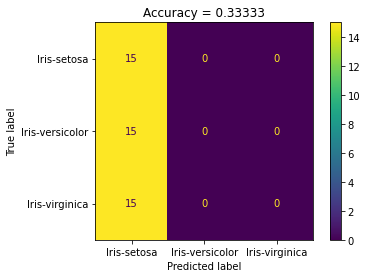

In [30]:
utils.evaluate(zero_r_model,
               X_train, X_test,
               y_train, y_test)

Como era de esperar, el modelo *Zero-R* obtiene malos resultados, pues solo predice la clase mayoritaria en el conjunto de entrenamiento (`Iris-setosa`).

Vamos a ver los resultados del árbol de decisión sin el conjunto de datos discretizado:

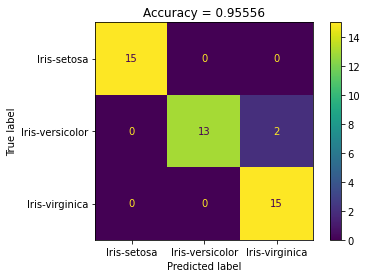

In [31]:
utils.evaluate(tree_model,
               X_train, X_test,
               y_train, y_test)

Y con el conjunto de datos discretizado:

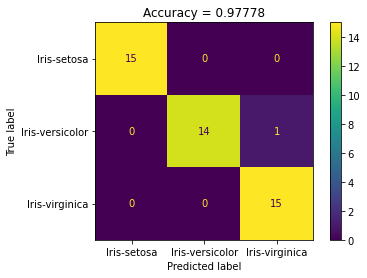

In [32]:
utils.evaluate(discretize_tree_model,
               X_train, X_test,
               y_train, y_test)

Es evidente que los árboles de decisión obtienen mejores resultados que el algoritmo *Zero-R*. De hecho es importante comentar que el árbol de decisión entrenado con el conjunto de datos discretizado obtiene una mayor tasa de acierto que su homólogo no discretizado.

**¿Cómo ha distinguido el algoritmo de inducción de árboles de decisión las variables categóricas?**

Este algoritmo es capaz de reconocer las variables categóricas gracias al uso de la codificación *one-hot* durante la discretización. Esta codificación  transforma cada atributo categórico con $ n $ estados en $ n $ atributos binarios (uno de ellos fijado a 1 y el resto a 0) indicando a qué estado pertenece la instancia correspondiente.

**¿Por qué se utiliza esta codificación?**

La codificación *one-hot* viene motivada por los algoritmos de aprendizaje que no manejan atributos categóricos, pues permite solucionar elegantemente este problema. De hecho permite obtener modelos más expresivos manteniendo la interpretabilidad.

Por otro lado, la mayor parte de los algoritmos de aprendizaje de la librería `scikit-learn` solo trabajan con variables predictoras numéricas, por lo que aplicar esta transformación es un requisito necesario antes de entrenar los correspondientes modelos. Este es el caso de los árboles de decisión, pues sin necesidad de modificar el algoritmo, y usando el método estándar de considerar todos los valores (únicos) como posibles umbrales es capaz de manejar los atributos categóricos adecuadamente.

No obstante, esta codificación no es única sino que `scikit-learn` implementa una gran variedad. La lista completa se encuentra en el siguiente [enlace](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

# Trabajo a entregar

Un informe reproduciendo el estudio que hemos hecho con `iris` para los otros dos conjuntos de datos. En los enlaces a los diferentes conjuntos de datos se puede encontrar información sobre el significado semántico del problema. Debéis explorar los conjuntos de datos, preprocesarlos y aprender los modelos vistos para después realizar un proceso de clasificación que tendréis que interpretar. El estudio de ambos conjuntos de datos se deberá incluir en una única libreta (`md_nombregrupo_practica1.ipynb`).

Los siguientes elementos deben estar presentes en la libreta para cada uno de los conjuntos de datos:

* Análisis exploratorio de datos mediante gráficas y estadísticos.
* Preprocesamiento de datos.
* Aprendizaje y evaluación de un clasificador *Zero-R*.
* Aprendizaje y evaluación de un árbol de decisión (sin y con discretización).

Todos los apartados deberán realizarse mediante proceso *holdout* estratificado, discutiendo los resultados y comparando los tres modelos. Además, se deberán analizar las matrices de confusión correspondientes.

Es muy importante tener en cuenta los siguientes criterios de evaluación:

* Deben realizarse todos los puntos anteriores.
* Deben explicarse coherentemente los resultados, utilizando siempre que se pueda un vocabulario técnico (palabras clave).
* El código debe ser claro y estar bien documentado.
* Las explicaciones deben ser claras y el documento estar bien estructurado.
* El código debe ser reproducible.

Como se puede ver, hay 5 puntos de evaluación que supondrán la valoración media de la práctica. Ya sabéis que la media es un estadístico que se ve afectado enormemente por los valores extremos, así que, aunque el contenido sea correcto, si no se explica bien o no está presentable, la nota se verá notablemente afectada.

**Recordar que asociada a esta práctica habrá una entrevista para completar la evaluación de la práctica.**